<a href="https://colab.research.google.com/github/bhuvanpatle/MachineLearningPractice/blob/main/exercise/Exercise_2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 2: Python for Data Analysis with Google Colab

Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set()


In [ ]:
df_hotels =  pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-11/hotels.csv')

In [ ]:
print(df_hotels)

               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July     

In [ ]:
df_hotels = df_hotels.reset_index().rename(columns={'index':'id'})

Question 1

In [ ]:
def check_values(df):
    data = []
    for column in df.columns:
      data.append([
                  column, \
                  df[column].dtype, \
                  df[column].isna().sum(), \
                  round(100*(df[column].isna().sum()/len(df)),4), \
                  df[column].nunique()
                  ])
    return pd.DataFrame(columns=['Data_Features','Data_Type','Null','Null_Percentage','Unique_Value'], data=data)


In [ ]:
print(df_hotels)


            id         hotel  is_canceled  lead_time  arrival_date_year  \
0            0  Resort Hotel            0        342               2015   
1            1  Resort Hotel            0        737               2015   
2            2  Resort Hotel            0          7               2015   
3            3  Resort Hotel            0         13               2015   
4            4  Resort Hotel            0         14               2015   
...        ...           ...          ...        ...                ...   
119385  119385    City Hotel            0         23               2017   
119386  119386    City Hotel            0        102               2017   
119387  119387    City Hotel            0         34               2017   
119388  119388    City Hotel            0        109               2017   
119389  119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                   

In [ ]:
check_values(df_hotels)

,Data_Features,Data_Type,Null,Null_Percentage,Unique_Value
0,id,int64,0,0.0000,119390
1,hotel,object,0,0.0000,2
2,is_canceled,int64,0,0.0000,2
3,lead_time,int64,0,0.0000,479
4,arrival_date_year,int64,0,0.0000,3
5,arrival_date_month,object,0,0.0000,12
6,arrival_date_week_number,int64,0,0.0000,53
7,arrival_date_day_of_month,int64,0,0.0000,31
8,stays_in_weekend_nights,int64,0,0.0000,17
9,stays_in_week_nights,int64,0,0.0000,35


Question 2

In [ ]:
df_hotels.is_canceled.value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

In [ ]:
df_hotels.is_canceled.value_counts(normalize=True)

is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64

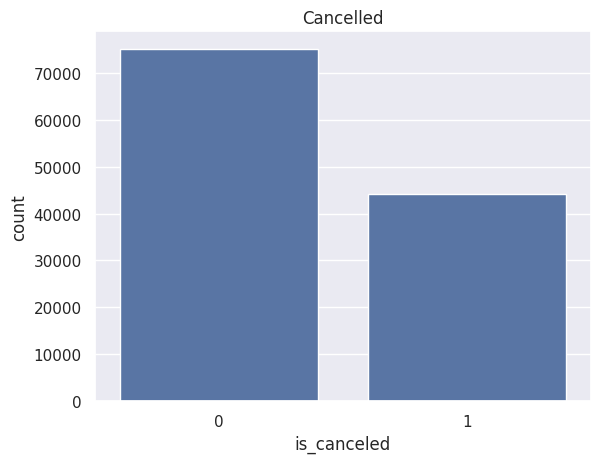

In [ ]:
sns.countplot(data = df_hotels, x = 'is_canceled')
plt.title('Cancelled')
plt.show()

Question 3

3 a

In [ ]:
CityHotel = round(100*(len(df_hotels[(df_hotels.hotel == 'City Hotel') & (df_hotels.is_canceled == 1)])/len(df_hotels[df_hotels.hotel == 'City Hotel'])), 2)
print(CityHotel)

41.73


3 b

In [ ]:
ResortHotel = round(100*(len(df_hotels[(df_hotels.hotel == 'Resort Hotel') & (df_hotels.is_canceled == 1)])/len(df_hotels[df_hotels.hotel == 'Resort Hotel'])), 2)
print(ResortHotel)

27.76


3 c

In [ ]:
if CityHotel > ResortHotel:
  print('City Hotel has more cancellations')
else:
  print('Resort Hotel has more cancellations')

City Hotel has more cancellations


4

In [ ]:
df_checkout = df_hotels[df_hotels.is_canceled == 0]
print(df_checkout)

            id         hotel  is_canceled  lead_time  arrival_date_year  \
0            0  Resort Hotel            0        342               2015   
1            1  Resort Hotel            0        737               2015   
2            2  Resort Hotel            0          7               2015   
3            3  Resort Hotel            0         13               2015   
4            4  Resort Hotel            0         14               2015   
...        ...           ...          ...        ...                ...   
119385  119385    City Hotel            0         23               2017   
119386  119386    City Hotel            0        102               2017   
119387  119387    City Hotel            0         34               2017   
119388  119388    City Hotel            0        109               2017   
119389  119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                   

5

5a

In [ ]:
reservations = df_checkout.groupby(['hotel','arrival_date_month'])['id'].nunique()